# Food Vision Big Classifier

**Introduction**

This project focuses on developing a machine learning model for classifying types of food from photographs. The goal is to build a robust image classification system capable of accurately identifying different food categories based on visual features. To train and evaluate the model, we utilized the Food-101 dataset, a comprehensive collection of food images sourced from Kaggle. This dataset comprises 101 distinct classes of food, providing a diverse and challenging benchmark for training and testing the model's performance. 

*Download data here:* https://www.kaggle.com/datasets/dansbecker/food-101

## Data preparation

Now let's see what the different images in our folder look like

In [10]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
# Function to show random images from folders
def show_random_images_from_folders(directory_path):
    folders = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
    selected_folders = random.sample(folders, 9)
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    for ax, folder_name in zip(axes.flatten(), selected_folders):
        folder_path = os.path.join(directory_path, folder_name)
        images = [name for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))]
        img_name = random.choice(images)
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)       
        ax.imshow(img)
        ax.set_title(folder_name)
        ax.axis('off')   
    plt.show()

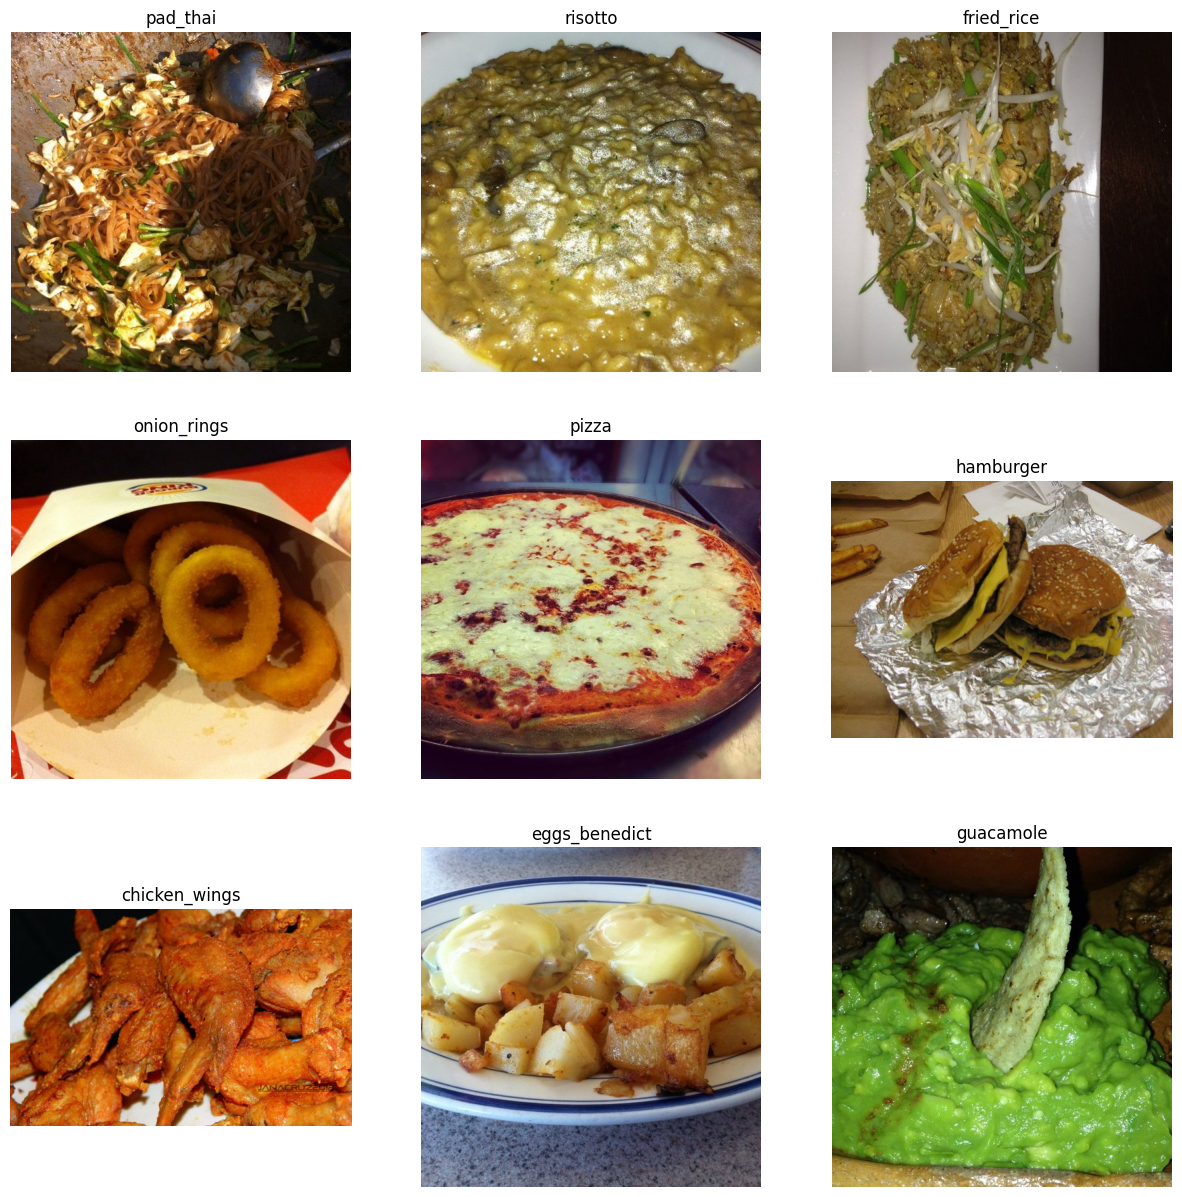

In [11]:
directory_path = 'food-101-images'
show_random_images_from_folders(directory_path)

In [21]:
# Get class names and print first 5
class_names = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
class_names[:5]

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare']

In [22]:
def get_image_paths_and_labels(directory_path):
    class_names = [name for name in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, name))]
    image_paths = []
    labels = []
    
    for class_name in class_names:
        folder_path = os.path.join(directory_path, class_name)
        images = [os.path.join(folder_path, name) for name in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, name))]
        image_paths.extend(images)
        labels.extend([class_name] * len(images))
    
    return image_paths, labels
image_paths, labels = get_image_paths_and_labels(directory_path)